<a href="https://colab.research.google.com/github/kholbyjack/CustomerSegmentation/blob/main/CustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project-4**

***Project Title:*** Customer Segmentation

***Project Description:*** In this project, you will build an unsupervised machine learning model to segment customers based on their demographics and spending behavior. The dataset includes information on customers' age, gender, annual income, and spending score (a metric assigned by the mall based on how much customers spend and how often they visit).

***Dataset Details:*** The data set contains 200 customer records.

***Datasets Location:*** Canvas -> Modules -> Week 13 -> Dataset -> **"customers.csv"**.

Please save your Google Colab project as FirstName_LastName_Project4.ipynb and submit (upload) your source code to Canvas.

This project will give you hands-on experience with unsupervised clustering, data preprocessing, and cluster evaluation. Customer segmentation has real-world applications in marketing and e-commerce, where it helps businesses tailor their offerings to different customer groups.


# Task 1: Data Exploration and Preprocessing

*   Load the dataset and display the first few rows.
*   Check for missing values and handle them appropriately (e.g., remove rows, fill with mean/median, etc.).
*   Perform basic EDA:
    *   Summary statistics (mean, min, max, etc.).
    *   Distributions of numerical features (age, income, spending score).
    *   Count of categories for gender.
*   Feature preprocessing:
    *   Encode categorical variables (e.g., gender) if needed.
    *   Scale/standardize numerical features (e.g., using StandardScaler or MinMaxScaler) before clustering.

---First Five Rows of Customer Information---
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

---Customer Information Details---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object

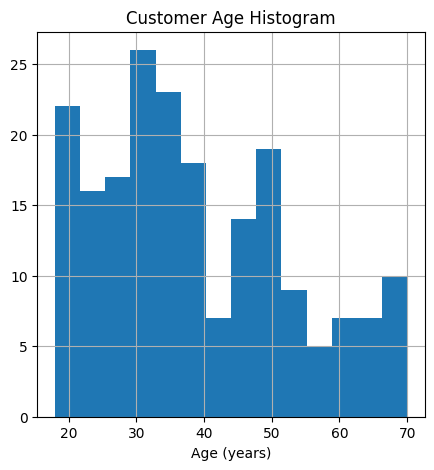

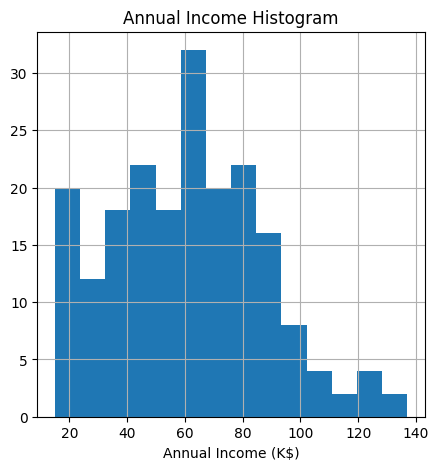

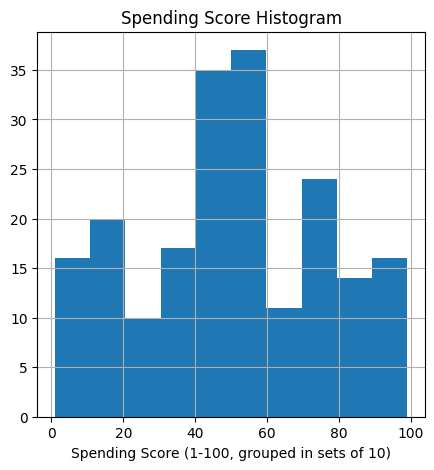


---Counts for Customer Genders---


,Annual Income (k$)
Gender,
Female,112
Male,88


,Age
Gender,
Female,112
Male,88


,Spending Score (1-100)
Gender,
Female,112
Male,88



---Mean Values for Customer Genders---


,Annual Income (k$)
Gender,
Female,59.25
Male,62.23


,Age
Gender,
Female,38.0
Male,40.0


,Spending Score (1-100)
Gender,
Female,52.0
Male,49.0



---First Five Rows After Feature Preprocessing---
   CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)
0           1       0 -1.424569           -1.738999               -0.434801
1           2       0 -1.281035           -1.738999                1.195704
2           3       1 -1.352802           -1.700830               -1.715913
3           4       1 -1.137502           -1.700830                1.040418
4           5       1 -0.563369           -1.662660               -0.395980
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


/tmp/ipython-input-4114820068.py:72: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  transformed_customers['Gender'] = transformed_customers['Gender'].replace(["Male", "Female"], [0, 1]).infer_objects(copy=False)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Data Check
# ---load the dataset and display the first few rows
customers = pd.read_csv("customers.csv")
print("---First Five Rows of Customer Information---")
print(customers.head(5))
print()

# ---missing value check
print("---Customer Information Details---")
customers.info()
print()
# There are no missing values, since there are 200 non-null values for each variable

# EDA
# ---summary statistics
# Customer ID is just an identifier, so it doesn't need to be analyzed
print()
print("---Summary Statistics---")
num_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for column in num_columns:
  print(f"Statistics for {column}")
  print(f"Average {column}: {round(customers[column].mean(), 2)}")
  print(f"Smallest {column}: {round(customers[column].min(), 2)}")
  print(f"Largest {column}: {round(customers[column].max(), 2)}")
  print()

# ---numerical distributions (histograms for numerical features)
print()
print("---Histograms for Numerical Variables---")
customers['Age'].hist(bins=14, figsize=(5, 5))
plt.title("Customer Age Histogram")
plt.xlabel("Age (years)")
plt.show()

customers['Annual Income (k$)'].hist(bins=14, figsize=(5, 5))
plt.title("Annual Income Histogram")
plt.xlabel("Annual Income (K$)")
plt.show()

customers['Spending Score (1-100)'].hist(bins=10, figsize=(5, 5))
plt.title("Spending Score Histogram")
plt.xlabel("Spending Score (1-100, grouped in sets of 10)")
plt.show()


# ---count of categories for gender
print()
print("---Counts for Customer Genders---")
# mean salary for gender
display(customers.groupby(['Gender'])['Annual Income (k$)'].size())
# mean age for gender
display(customers.groupby(['Gender'])['Age'].size())
# mean spending score for gender
display(customers.groupby(['Gender'])['Spending Score (1-100)'].size())
print()
print("---Mean Values for Customer Genders---")
# mean salary for gender
display(round(customers.groupby(['Gender'])['Annual Income (k$)'].mean(), 2))
# mean age for gender
display(round(customers.groupby(['Gender'])['Age'].mean()))
# mean spending score for gender
display(round(customers.groupby(['Gender'])['Spending Score (1-100)'].mean()))

# Feature Preprocessing
# ---encode gender (0 - male, 1 - female)
transformed_customers = customers.copy()
transformed_customers['Gender'] = transformed_customers['Gender'].replace(["Male", "Female"], [0, 1]).infer_objects(copy=False)

# ---scale nuumerical features (standard scaler)
# customer id and gender will not be scaled because even though they are numbers, they are categorical variables
scaler = StandardScaler()
transformed_customers['Age'] = scaler.fit_transform(transformed_customers[['Age']])
transformed_customers['Annual Income (k$)'] = scaler.fit_transform(transformed_customers[['Annual Income (k$)']])
transformed_customers['Spending Score (1-100)'] = scaler.fit_transform(transformed_customers[['Spending Score (1-100)']])

print()
print("---First Five Rows After Feature Preprocessing---")
print(transformed_customers.head(5))
print(customers.head(5))

# need X and y for this, don't really need sample can just make a copy since the dataset is so small

# Task 2: Model Building (Clustering)
You will train and evaluate several unsupervised clustering models on the preprocessed data set.

Train and compare at least four different clustering models on the preprocessed data. You must include:

*   K-Means Clustering
    *   Try different values of k (e.g., 2–10).
    *   Plot the Elbow curve (inertia vs. k).
*   Agglomerative (Hierarchical) Clustering
    *   Try different numbers of clusters.
*   DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
    *   Tune parameters eps and min_samples.
*   Gaussian Mixture Model (GMM)
    *   Try different numbers of components.

For each algorithm, briefly explain:
*   Which parameters you chose (e.g., n_clusters, eps, min_samples, etc.).
*   Any challenges you faced (e.g., DBSCAN sensitivity to parameters).
*   Compare how the clusters differ across models.

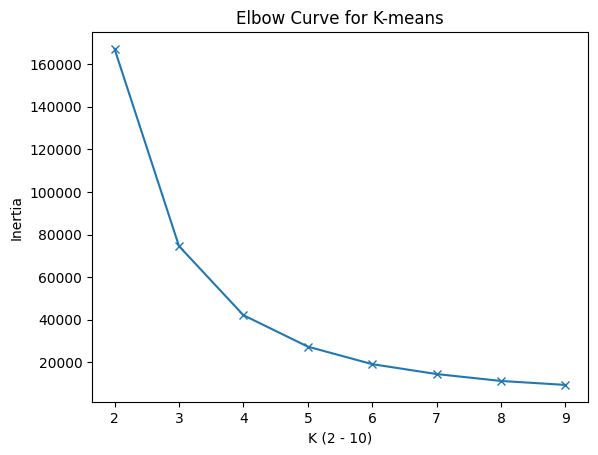

{2: 167169.74460261405, 3: 74584.0583049658, 4: 42139.608853532605, 5: 27367.677694530325, 6: 19145.167761012326, 7: 14488.75013844033, 8: 11250.477028514915, 9: 9391.376972420865}


In [ ]:
# K-Means Clustering
from sklearn.cluster import KMeans

# dictionaries for storing the different models and values
K = range(2,10)
kmeans_models = {}
kmeans_inertias = {}
kmeans_inertiasarray = []
kmeans_ypreds = {}

# for loop for training models with different k values
for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans_models[k] = kmeans
  kmeans_ypreds[k] = kmeans.fit_predict(transformed_customers)
  kmeans_inertiasarray.append(kmeans.inertia_)
  kmeans_inertias[k] = kmeans_inertiasarray[-1]

# K-Means Clustering: plot the elbow curve
plt.plot(K, kmeans_inertiasarray, 'x-')
plt.title("Elbow Curve for K-means")
plt.xlabel("K (2 - 10)")
plt.ylabel("Inertia")
plt.show()

print(kmeans_inertias)

In [ ]:
# Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
A = range(2, 10)
agglo_models = {}
agglo_ypreds = {}

# for loop for trying different numbers of clusters
for a in A:
  agglo = AgglomerativeClustering(n_clusters=a)
  agglo_models[a] = agglo
  agglo_ypreds[a] = agglo.fit_predict(transformed_customers)

In [ ]:
# DBSCAN
from sklearn.cluster import DBSCAN

db_model = DBSCAN(eps=3, min_samples=4).fit(transformed_customers)
db_ypred = db_model.labels_

# calculating the number of clusters and noise in predicted data
n_clusters = len(set(db_ypred)) - (1 if -1 in db_ypred else 0)
print(n_clusters)
n_noise = list(db_ypred).count(-1)
print(n_noise)

12
13


In [ ]:
# GMM
from sklearn.mixture import GaussianMixture

gmm_model = GaussianMixture(n_components = 4, random_state=42)
gmm_ypred = gmm_model.fit_predict(transformed_customers)

In [ ]:
# Brief Evaluations
# ---K-Means
"""
 Chosen k value: Using the silhouette score computed in task 3, 2 is the value of k chosen.
  This is because it gave a higher silhouette score than the pther values of k.
 Challenges: Trying to find a balance between a good silhouette score and a good inertia.
 Clusters: These clusters do not seem to be well-differentiated, since changing the k value
  still did not result in a high silhouettte score.
"""
# ---Agglomerative
'''
Chosen parameters: A value of 2 for the number of clusters was chosen since this
  gave a better silhoutte score than the higher values.
Challenges: There was big differences in the silhouette scores for different numbers of clusters.
Clusters: Like with K-Means, the clusters did not seem well-differentiated. K-Means did
  have a slightly better silhouette score.
'''
# ---DBSCAN
'''
Chosen parameters: Eps = 3, min_samples = 4. This was chosen through trying
  to find parameters that would produce a number of clusters greater than 1.
Challenges: The number of clusters cannot be manualy set for this algorithm, and
  since the dataset was not created with clustering in mind DBSCAN had a hard time
  creating clusters.
Clusters: The clustering for this algorithm was not good, and it resulted in a very
  poor silhouette score of 0.23.
'''
# ---GMM
'''
Chosen parameters: n_components = 4. This was decided on because experimentation
  revealed that this produced a decent silhouette score.
Challenges: The number of components needed to produce a good silhouette score for
  the GMM algorithm was different than the numbers that worked for K means and Agglomerative
  clustering.
Clusters: There are 4 clusters in this model's predicted data, and the silhouette score
  for this algorithm was better than DBSCAN but worse than the best K-Means and Agglomerative
  models.
'''

'\nChosen parameters:\nChallenges:  \n'

# Task 3: Model Evaluation and Cluster Analysis

*   For each clustering model, compute:
    *   Silhouette score (for all models).
    *   Inertia (for K-Means only).
*   Compare the models based on these metrics and identify which configuration seems to produce the most meaningful clusters.

*   Choose your best model and:
    *   Assign a cluster label to each customer.
    *   Analyze and describe each segment, for example:
        *   Average age, income, and spending score per cluster.
        *   Which clusters seem to represent “high value” customers vs low spenders, etc.
    *   Visualize the clusters (e.g., 2D scatter plots using pairs of features such as Income vs Spending Score, colored by cluster).
















In [ ]:
# K-Means Evaluation (for each k value)
from sklearn.metrics import silhouette_score

# ---silhouette score
silhouette_kmeans = silhouette_score(transformed_customers, kmeans_ypreds[2])
print(f"K-Means Silhouette Score: {round(silhouette_kmeans, 5)}")

# ---inertia
print(f"K-Means Inertia: {round(kmeans_inertias[2], 5)}")

K-Means Silhouette Score: 0.62147
K-Means Inertia: 167169.7446


In [ ]:
# Agglomerative Evaluation
# ---silhouette score
for a in A:
  silhouette_agglo = silhouette_score(transformed_customers, agglo_ypreds[a])
  print(f"Agglomerative Silhouette Score(with n_clusters = {a}): {round(silhouette_agglo, 5)}")

Agglomerative Silhouette Score(with n_clusters = 2): 0.61407
Agglomerative Silhouette Score(with n_clusters = 3): 0.55338
Agglomerative Silhouette Score(with n_clusters = 4): 0.55336
Agglomerative Silhouette Score(with n_clusters = 5): 0.49783
Agglomerative Silhouette Score(with n_clusters = 6): 0.48076
Agglomerative Silhouette Score(with n_clusters = 7): 0.47588
Agglomerative Silhouette Score(with n_clusters = 8): 0.4741
Agglomerative Silhouette Score(with n_clusters = 9): 0.47865


In [ ]:
# DBSCAN Evaluation
# ---silhouette score
silhouette_db = silhouette_score(transformed_customers, db_ypred)
print(f"DBSCAN Silhouette Score: {round(silhouette_db, 5)}")

DBSCAN Silhouette Score: 0.22607


In [ ]:
# GMM Evaluation
# ---silhouette score
silhouette_gmm = silhouette_score(transformed_customers, gmm_ypred)
print(f"GMM Silhouette Score: {round(silhouette_gmm, 5)}")

GMM Silhouette Score: 0.52659


In [ ]:
# Best Model: K-Means because it had the best silhouette score, meaning that it had the most meaningful clusters.
# ---cluster labels
cluster_labels = kmeans_ypreds[2]
# since there were only two clusters in the final model, customers will be assigned either 0 or 1 to mark the cluster
customers['Cluster'] = cluster_labels
print("---Data Sample with Cluster Labels---")
print(customers.head(5))

# ---analyze each segment
# making a copy of customers with decoded values
# inversed_customers = customers.copy()
# inversed_customers['Age'] = scaler.inverse_transform(customers[['Age']])
# inversed_customers['Annual Income (k$)'] = scaler.inverse_transform(customers[['Annual Income (k$)']])
# inversed_customers['Spending Score (1-100)'] = scaler.inverse_transform(customers[['Spending Score (1-100)']])

print()
print("---Average Values per Cluster---")
display(round(customers.groupby(['Cluster'])['Annual Income (k$)'].mean(), 2))
display(round(customers.groupby(['Cluster'])['Age'].mean(), 2))
display(round(customers.groupby(['Cluster'])['Spending Score (1-100)'].mean(), 2))

# current income times age
customers['Age*Income'] = customers['Age'] * customers['Annual Income (k$)']
print()
print("---Mean Product of Age and Annual Income---")
display(round(customers.groupby(['Cluster'])['Age*Income'].mean(), 2))

---Data Sample with Cluster Labels---
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        0  
1        0  
2        0  
3        0  
4        0  

---Average Values per Cluster---


,Annual Income (k$)
Cluster,
0,39.56
1,81.56


,Age
Cluster,
0,39.75
1,37.95


,Spending Score (1-100)
Cluster,
0,49.93
1,50.47



---Mean Product of Age and Annual Income---


,Age*Income
Cluster,
0,1622.94
1,3073.52


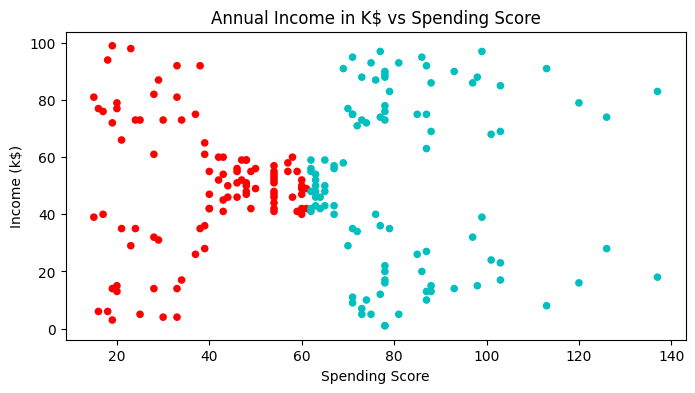

In [ ]:
# ---visualize clusters with scatterplot
plt.figure(figsize=(8, 4))
colors = np.where(customers['Cluster'] == 0, 'r', 'c') # first cluster is red, second one is cyan
plt.scatter(customers['Annual Income (k$)'], customers['Spending Score (1-100)'], s=20, c = colors)
plt.title("Annual Income in K$ vs Spending Score")
plt.ylabel("Income (k$)")
plt.xlabel("Spending Score")
plt.show()
# the inflated values are due to issues in scaling

# Task 4: Insights and Conclusion

*   Summarize your best clustering solution:
    *   Which algorithm and parameters did you choose?
    *   How many clusters did you end up with?
*   Describe business insights:
    *   What types of customer segments did you discover?
    *   How could a mall or online store use these segments to:
        *   Personalize marketing campaigns,
        *   Improve customer retention,
        *   Optimize product recommendations?

# Conclusion
The best clustering algorithm was the K-Means clustering algorithm with k = 2. A value of k = 2 means that there were 2 clusters in the final model. The Silhouette score for this model was around 0.62 and the inertia for this model was 167169.74. For both segments, the average incomes were very different, with cluster 0 having a lower average income than cluster 1. However, the average age and spending scores were around the same for each cluster, with the avergae age being around 40 and the average spending score being around 50 out of 100. A mall could use these two segments by advertising expensive items to those in cluster 1 and less expensive items to those in segment 0 to entice customers with things that they can afford. This could also be combined by advertising to customers with higher spending scores more than those with lower ones, since customers with higher spending scores are more likely to buy more items.